**Objetivo:**  

Dados las gráficas 1.2 de 20.000 galaxias con curvas según: The Host Galaxies and Classification of Active Galactic Nuclei - 2006 y Z < 0.8, pre etiquetar entre 4 grupos, usando la curva "C" del diagrama BPT: OI   

Analizando los datos de ejex_OH, ejey_OHb 

**Galaxias: Infrarroja, Seyfert o LINER**

**PROCEDIMIENTO:**  
    **1.1** Dados iniciales.  
    **1.2** Para OI.       
        
        a. Infrarroja = Abajo de Kewley.
        aa. Pre-Etiquetado Infrarrojas
        
        b. Gráfico diferente de Infrarrojas.
       
        c. Seyfert = Arriba de la línea Seyfert-LINER.
        cc. Pre-Etiquetado gráfico Seyfert
        
        d. LINER = Abajo de la línea Seyfert-LINER.
        dd. Pre-Etiquetado gráfico LINER
        
        
    **1.3** Etiquetas MANERA DEDUCTIVA.
    1.3.1 Comprobación de cantidades.
    1.3.2 Solucion de cantidades.
    1.3.3 Matriz OI Deductiva.
    1.3.4 Graficas de OI Deductiva.

## 1.1 Dados iniciales. 

Could not import regions, which is required for some of the functionalities of this module.
Valores duplicados en la columna 'ra': [132.58559 179.51375 185.48906 351.8132 ]
Índices de los valores duplicados en la columna 'ra': Int64Index([4105, 5929, 6215, 11228], dtype='int64')
Índices de TODAS las ocurrencias de valores duplicados en la columna 'ra': Int64Index([4100, 4105, 5928, 5929, 6213, 6215, 11227, 11228], dtype='int64')


C:\ProgramData\Anaconda33\lib\site-packages\astroquery\sdss\core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


Número de valores únicos: 293697
Número de valores repetidos 1 vez: 14895
Número de valores repetidos 2 veces: 1239
Número de valores repetidos 3 veces: 211
Número de valores repetidos 4 veces: 242
Número de valores repetidos 5 veces: 45
Número de valores repetidos 6 veces: 14
Número de valores repetidos 7 veces: 3
Número de valores repetidos 8 veces: 0
Número de valores repetidos 9 veces: 0
Número de valores repetidos 10 veces: 0
Valores duplicados en la columna 'ra': [146.9639  146.94999 146.63167 ... 257.38367 258.13561 257.98823]
Índices de los valores duplicados en la columna 'ra': Int64Index([     5,      7,      8,      9,     10,     12,     15,     18,
                20,     22,
            ...
            329098, 329099, 329100, 329102, 329103, 329116, 329285, 329438,
            329439, 329576],
           dtype='int64', length=19304)
Índices donde el valor de 'ra' es igual a 145.51241: Int64Index([167, 170], dtype='int64')


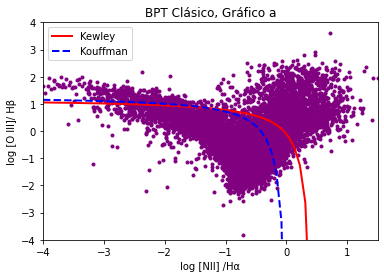

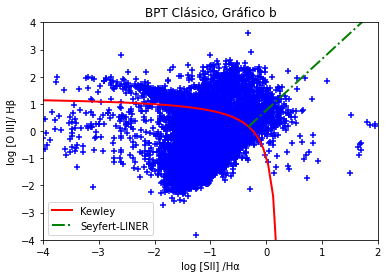

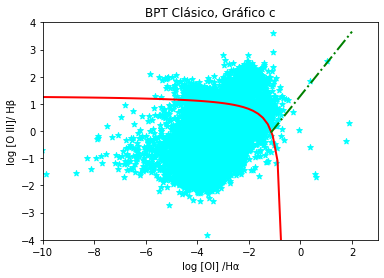

In [1]:
%run "C:\Users\Cristina Quiazúa M\Desktop\MyBPT\SDSS\With20MD_AA\1.3 GrafConDataIgualesYCurv NoRepetidas.ipynb"

In [2]:
len(data)

20000

In [3]:
#Convertir pandas.core.frame.DataFrame a astropy.table.table.Table
astropy_table = Table.from_pandas(data)

In [4]:
data = astropy_table

## Razones

In [5]:
ejey_OHb=np.log((data['oiii_5007_flux'])/(data['h_beta_flux']))

ejex_NH=np.log((data['nii_6548_flux']+data['nii_6584_flux'])/data['h_alpha_flux'])
ejex_SH=np.log((data['sii_6717_flux']+data['sii_6731_flux'])/data['h_alpha_flux'])
ejex_OH=np.log((data['oi_6300_flux'])/(data['h_alpha_flux']))

In [6]:
# Ingresar las columnas de razones a la data.
data.add_column(ejey_OHb, name='Ejey_OHB')
data.add_column(ejex_NH, name='Ejex_NH')
data.add_column(ejex_SH, name='Ejex_SH')
data.add_column(ejex_OH, name='Ejex_OH')

In [7]:
data[1:5]

specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes11,float64,float64,float64,float64
3104165492441507840,210.66121,17.354733,0.09812373,278.3398,41.5959,13.99059,38.90205,117.3375,41.59763,32.74299,11.27111,GALAXY,STARFORMING,-1.0896166439489463,-0.5774522630658416,-1.3201851645522702,-3.2065998546735357
1517815380746201088,214.81139,41.564716,0.1191585,137.9719,14.83254,23.41135,26.57274,80.14951,42.57674,17.41821,18.36502,GALAXY,BROADLINE,0.45639753157575236,-0.2568203760813211,-0.8327896492215614,-2.0166022729357027
2800244799460894720,165.09742,16.741362,0.06800999,89.11868,33.12446,58.52667,63.64492,191.9678,40.7507,26.77438,19.0437,GALAXY,BROADLINE,0.5692105654973298,1.0536945219441896,-0.27746988015478935,-1.543232626364033
2362234269872449536,172.63366,34.076795,0.102158,64.09819,19.61079,6.668521,8.221705,24.79856,11.83207,12.18764,0.7733082,GALAXY,STARFORMING,-1.078681828756059,-0.663294662499558,-0.9815413830917822,-4.417493729916491


## 1.2 Para OI. 
    
        a. Infrarroja = Abajo de Kewley.
        aa. Pre-Etiquetado Infrarrojas
                
        b. Gráfico diferente de Infrarrojas.
        
        c. Seyfert = Arriba de la línea Seyfert-LINER.
        cc. Pre-Etiquetado gráfico Seyfert
        
        d. LINER = Abajo de la línea Seyfert-LINER.
        dd. Pre-Etiquetado gráfico LINER


### a. Infrarroja = Abajo de Kewley.

In [8]:
# Convertir la tabla de datos en un DataFrame de Pandas
df = data.to_pandas()

In [9]:
# Filtrar los datos que están por debajo de la línea de Kewley y tienen log [OI] /Hα <= 0.7
filtrados = df.query("Ejey_OHB <= (1.33 + (0.73 / (Ejex_OH + 0.59))) and Ejex_OH <= -0.7")

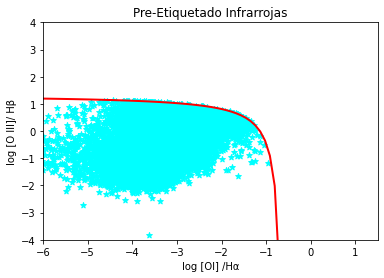

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(filtrados["Ejex_OH"], filtrados["Ejey_OHB"], marker="*", color="cyan")

ax.set_xlim(-6, 1.5)
ax.set_ylim(-4, 4)
plt.title('Pre-Etiquetado Infrarrojas')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [OI] /Hα')

# Kewley
x1 = np.linspace(-6,-0.7) 
y1 = 1.33 + (0.73/(x1+0.59))
plt.plot(x1, y1, '-', color='red', lw=2, label= 'Kewley') 

### aa. Pre-Etiquetado Infrarrojas

In [11]:
# Agregar una nueva columna "Infrarroja" al DataFrame con los valores "1" o "0"
df["Infrarroja"] = df.apply(lambda row: 1 if (row["Ejey_OHB"] <= (1.33 + (0.73 / (row["Ejex_OH"] + 0.59)))) and (row["Ejex_OH"] <= -0.7) else "0", axis=1)

In [12]:
df[10:15]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja
10,1062982871699974144,154.60474,46.404902,0.123735,704.3109,199.27100,381.741400,37.28394,112.45700,93.35062,67.65799,15.896410,b'GALAXY',b'STARBURST',0.650078,-1.548313,-1.475762,-3.791127,1
11,2015417523125643264,191.01244,6.287413,0.165674,121.6849,24.67171,12.619070,16.87188,50.88948,22.67010,18.02446,7.996521,b'GALAXY',b'STARFORMING',-0.670448,-0.585443,-1.095340,-2.722428,1
12,936786419555264512,138.02905,43.717246,0.060355,702.1112,205.18500,451.900900,31.21945,94.16506,115.89880,81.89982,24.297660,b'GALAXY',b'STARBURST',0.789551,-1.722707,-1.266842,-3.363712,1
13,2477132142425958400,242.77580,17.151947,0.186033,194.4646,31.70225,9.568507,28.69942,86.56406,10.04644,19.21068,6.562323,b'GALAXY',b'STARFORMING',-1.197910,-0.523030,-1.894127,-3.388905,1
14,2519863292986419200,191.27810,28.361928,0.091532,613.0876,173.04620,263.718800,29.67182,89.49706,76.22830,59.68037,9.477549,b'GALAXY',b'STARBURST',0.421325,-1.637966,-1.506525,-4.169582,1


In [13]:
conteo_i = df["Infrarroja"].value_counts()[1]
conteo_i

18679

In [14]:
conteo_0 = df["Infrarroja"].value_counts()["0"]
conteo_0

1321

In [15]:
suma=18673+1327
suma

20000

### b. Gráfico diferente de Infrarrojas.

In [16]:
# Calcular los índices de datos que no están debajo de la curva de Kewley
indices_no_kewley = ~((df["Ejey_OHB"] <= (1.33 + (0.73 / (df["Ejex_OH"] + 0.59)))) & (df["Ejex_OH"] <= -0.7))

# Seleccionar los datos que no están debajo de la curva de Kewley
datos_no_kewley = df[indices_no_kewley]

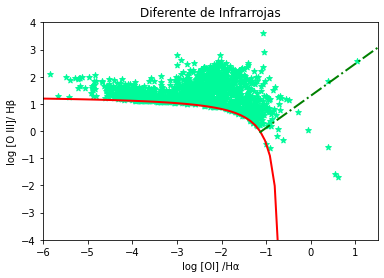

In [17]:
# Crear una figura y un subárea de gráfico
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_no_kewley["Ejex_OH"], datos_no_kewley["Ejey_OHB"], marker="*", color="mediumspringgreen")

ax.set_xlim(-6, 1.5)
ax.set_ylim(-4, 4)
plt.title('Diferente de Infrarrojas')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [OI] /Hα')

# Kewley
x1 = np.linspace(-6,-0.7) 
y1 = 1.33 + (0.73/(x1+0.59))
plt.plot(x1, y1, '-', color='red', lw=2, label= 'Kewley') 


# Seyfert-LINER
x2 = np.linspace(-1.15,2)
y2 = 1.3 + (1.18*x2) 
plt.plot(x2, y2, '-.', color='green', lw=2, label='Seyfert-LINER')

### c. Seyfert = Arriba de la línea Seyfert-LINER

In [18]:
# Calcular los índices de datos que están encima de la curva Seyfert-LINER y arriba de la curva Kewley
IndSeyfert = (df["Ejey_OHB"] > (1.3 + (1.18 * df["Ejex_OH"]))) & (df["Ejey_OHB"] >= (1.33 + (0.73 / (df["Ejex_OH"] + 0.59)))) 

# Seleccionar los datos que están al lado derecho de la curva Seyfert-LINER y arriba de la curva Kewley
DatSeyfert = df[IndSeyfert]

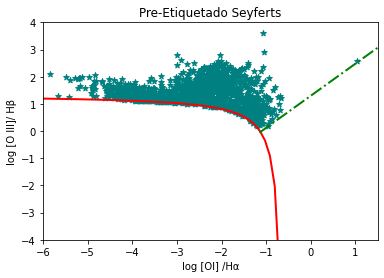

In [19]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(DatSeyfert["Ejex_OH"], DatSeyfert["Ejey_OHB"], marker="*", color="teal")
ax.set_xlim(-6, 1.5)
ax.set_ylim(-4, 4)
plt.title('Pre-Etiquetado Seyferts')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [OI] /Hα')

# Kewley
x1 = np.linspace(-6,-0.7) 
y1 = 1.33 + (0.73/(x1+0.59))
plt.plot(x1, y1, '-', color='red', lw=2, label= 'Kewley') 


# Seyfert-LINER
x2 = np.linspace(-1.15,2)
y2 = 1.3 + (1.18*x2) 
plt.plot(x2, y2, '-.', color='green', lw=2, label='Seyfert-LINER')

### cc. Pre-Etiquetado gráfico Seyferts

In [20]:
# Crear una columna "Seyfert" llena de ceros en el DataFrame
df['Seyfert'] = 0

# Identificar las filas que cumplen las condiciones del código y establecer "Seyfert" en 1
df.loc[IndSeyfert, 'Seyfert'] = 1

In [21]:
conteo_s = df["Seyfert"].value_counts()[1]
conteo_s

1302

In [22]:
df[80:85]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Seyfert
80,1387189820031264768,186.68453,9.048442,0.023137,2363.87500,565.29020,84.477130,391.984800,1182.31700,283.75710,289.23190,27.164050,b'GALAXY',b'STARBURST',-1.900858,-0.406490,-1.417191,-4.466163,1,0
81,3090711038866253824,212.00761,16.120834,0.129784,155.23700,40.56261,10.516620,17.625520,53.16264,30.70328,17.11654,5.646622,b'GALAXY',b'STARFORMING',-1.349890,-0.785261,-1.177513,-3.313895,1,0
82,3089620049141458944,211.15857,16.280142,0.069339,153.59130,31.75509,13.223350,17.706320,53.40635,33.70737,21.75994,6.968799,b'GALAXY',b'STARFORMING',-0.876069,-0.770030,-1.018501,-3.092852,1,0
83,1972658881972692992,167.75680,13.300534,0.092625,351.39910,106.55590,73.805500,29.925610,90.26255,71.94416,48.14748,10.927890,b'GALAXY',b'STARBURST',-0.367236,-1.072864,-1.073667,-3.470604,1,0
84,1155317933115729920,319.03925,1.074412,0.226192,61.08723,11.74083,5.886059,9.170021,27.65890,14.95667,11.63641,0.180403,b'GALAXY',b'STARFORMING',-0.690486,-0.506019,-0.831652,-5.824867,1,0


### d. LINER = Abajo de la línea Seyfert-LINER

In [23]:
# Calcular los índices de datos que no están debajo de la curva de Kewley
indices_no_kewley = ~((df["Ejey_OHB"] <= (1.33 + (0.73 / (df["Ejex_OH"] + 0.59)))) & (df["Ejex_OH"] <= -0.7))

In [24]:
# Calcular los índices de datos que están abajo de la curva Seyfert-LINER
PreIndLiner = df["Ejey_OHB"] < (1.3 + (1.18 * df["Ejex_OH"]))

In [25]:
# Combinar ambos conjuntos de índices para obtener los datos que están a la izquierda de Seyfert-LINER y no debajo de Kewley
IndLiner = indices_no_kewley & PreIndLiner

In [26]:
# Seleccionar los datos que cumplen las condiciones
Liner = df[IndLiner]

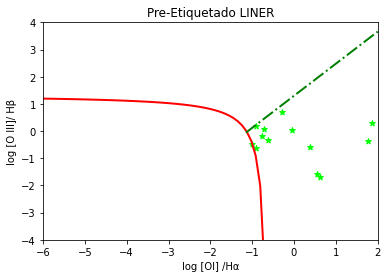

In [27]:
# Crear una figura y un subárea de gráfico
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(Liner["Ejex_OH"], Liner["Ejey_OHB"], marker="*", color="lime")

ax.set_xlim(-6, 2)
ax.set_ylim(-4, 4)
plt.title('Pre-Etiquetado LINER')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [OI] /Hα')

# Kewley
x1 = np.linspace(-6,-0.7) 
y1 = 1.33 + (0.73/(x1+0.59))
plt.plot(x1, y1, '-', color='red', lw=2, label= 'Kewley') 


# Seyfert-LINER
x2 = np.linspace(-1.15,2)
y2 = 1.3 + (1.18*x2) 
plt.plot(x2, y2, '-.', color='green', lw=2, label='Seyfert-LINER')

### dd. Pre-Etiquetado gráfico LINER

In [28]:
# Crear una columna "LINER" llena de ceros en el DataFrame
df['LINER'] = 0

# Identificar las filas que cumplen las condiciones del código y establecer "LINER" en 1
df.loc[IndLiner, 'LINER'] = 1

In [29]:
df[1785:1790]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Seyfert,LINER
1785,2415070214250063872,224.12230,24.882280,0.032995,130.87260,41.22069,63.00681,4.675422,14.10215,29.64097,...,3.976777,b'GALAXY',b'STARFORMING',0.424303,-1.941561,-0.975517,-3.493753,1,0,0
1786,2362181493314316288,174.30497,33.310882,0.033994,815.37880,203.67540,117.13570,58.307820,175.86990,177.33480,...,24.236440,b'GALAXY',b'STARBURST',-0.553194,-1.247572,-0.983304,-3.515796,1,0,0
1787,2399318054321285120,216.57631,25.010553,0.037182,602.19870,144.16210,35.85391,85.827280,258.87490,84.51382,...,21.346410,b'GALAXY',b'STARFORMING',-1.391486,-0.557907,-1.333990,-3.339704,1,0,0
1788,1015685726324418560,147.45602,52.270091,0.129610,61.71996,14.87392,9.25708,10.294900,31.05179,15.39216,...,1.696643,b'GALAXY',b'STARFORMING',-0.474221,-0.400615,-0.937425,-3.593956,1,0,0
1789,1919666827428915200,214.50679,10.663640,0.083299,206.85300,47.78539,44.10011,16.355850,49.33302,31.36877,...,9.725934,b'GALAXY',b'STARFORMING',-0.080258,-1.147079,-1.269169,-3.057212,1,0,0


In [30]:
conteo_L = df["LINER"].value_counts()[1]
conteo_L

16

In [31]:
# archivo_excel = 'ArchivoOI.xlsx'
# df.to_excel(archivo_excel, index=False)

## 1.3 Etiquetas MANERA DEDUCTIVA.

1.3.1 Comprobación de cantidades.  
1.3.2 Solucion de cantidades.  
1.3.3 Matriz SII Deductiva.  
1.3.4 Graficas de SII Deductiva.  

### 1.3.1 Comprobación de cantidades.

In [32]:
conteo_i = df["Infrarroja"].value_counts()[1]
conteo_i

18679

In [33]:
conteo_s = df["Seyfert"].value_counts()[1]
conteo_s

1302

In [34]:
conteo_L = df["LINER"].value_counts()[1]
conteo_L

16

In [35]:
Suma= conteo_i + conteo_s + conteo_L
Suma

19997

### 1.3.2 Solucion de cantidades.

In [36]:
SumaA = 20000- Suma
SumaA
# Existen 4 Galaxias que no fueron identificadas, seguiran identificadas como 0.

3

### 1.3.3 Matriz SII Deductiva.

In [37]:
# Obtener la lista de columnas que se deben evaluar
columnas_evaluar = ["Infrarroja", "Seyfert", "LINER"]

In [38]:
# Crear la columna "PreEtiqueta" con los valores correspondientes, si no es 1, entonces: es combinada.
def obtener_pre_etiqueta(row):
    etiquetas = []
    for etiqueta in columnas_evaluar:
        if row[etiqueta] == 1:
            etiquetas.append(etiqueta)
    if len(etiquetas) == 1:
        return etiquetas[0]
    else:
        return "N/I"

In [39]:
df["PreEtiquetaOI"] = df.apply(obtener_pre_etiqueta, axis=1)
df[7405:7411]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Seyfert,LINER,PreEtiquetaOI
7405,1855648851055110144,227.50141,32.876224,0.162121,281.7043,53.54595,12.443890,31.37528,94.63509,35.95357,...,b'GALAXY',b'STARFORMING',-1.459310,-0.804494,-1.463814,-3.128660,1,0,0,Infrarroja
7406,1556077561279178752,218.44535,36.447546,0.034463,1017.7030,258.29990,434.837200,64.47137,194.46050,170.79640,...,b'GALAXY',b'STARBURST',0.520850,-1.368738,-1.241601,-3.383451,1,0,0,Infrarroja
7407,2828374155609532416,178.42508,18.383526,0.120242,105.5161,27.29490,7.043173,11.27147,33.99737,16.52129,...,b'GALAXY',b'STARFORMING',-1.354641,-0.846245,-1.302594,-3.468055,1,0,0,Infrarroja
7408,1896052605981845504,246.15626,31.996672,0.096000,383.2329,76.66232,28.156900,43.12501,130.07500,74.62089,...,b'GALAXY',b'STARFORMING',-1.001618,-0.794196,-1.087123,-3.490950,1,0,0,Infrarroja
7409,1440167863754188800,193.10692,49.967605,0.178934,298.2150,72.49957,24.886150,34.23789,103.26940,46.71307,...,b'GALAXY',b'STARFORMING',-1.069269,-0.774138,-1.337039,-3.613466,1,0,0,Infrarroja
7410,1614713140958750720,163.77635,45.468955,0.082761,218.0935,59.97651,20.284460,26.01082,78.45465,44.73207,...,b'GALAXY',b'STARFORMING',-1.084098,-0.736067,-1.137194,-3.440536,1,0,0,Infrarroja


### 1.3.4 Graficas de SII Deductiva.

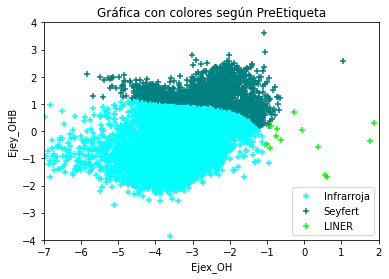

In [40]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Filtrar los datos por etiqueta
datos_infrarroja = df[df["PreEtiquetaOI"] == "Infrarroja"]
datos_liner = df[df["PreEtiquetaOI"] == "LINER"]
datos_seyfert = df[df["PreEtiquetaOI"] == "Seyfert"]

# Graficar los puntos con colores según la etiqueta
ax.scatter(datos_infrarroja["Ejex_OH"], datos_infrarroja["Ejey_OHB"], marker="+", color="cyan", label="Infrarroja")
ax.scatter(datos_seyfert["Ejex_OH"], datos_seyfert["Ejey_OHB"], marker="+", color="teal", label="Seyfert")
ax.scatter(datos_liner["Ejex_OH"], datos_liner["Ejey_OHB"], marker="+", color="lime", label="LINER")

# Configurar los límites de los ejes
ax.set_xlim([-7, 2])
ax.set_ylim([-4, 4])

# Agregar etiquetas y título
plt.xlabel("Ejex_OH")
plt.ylabel("Ejey_OHB")
plt.title("Gráfica con colores según PreEtiqueta")
plt.legend()

In [41]:
df3=df